<a href="https://colab.research.google.com/github/PreritSM/rimcrusher/blob/master/Horse_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')


train_human_dir = os.path.join('/tmp/horse-or-human/humans')


validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')


validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

--2020-08-14 15:21:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  76.9MB/s    in 1.9s    

2020-08-14 15:21:18 (76.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-08-14 15:21:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [3]:
import tensorflow as tf


In [4]:
model = tf.keras.models.Sequential([
    
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  
        batch_size=128,
       
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  
        target_size=(300, 300),  
        batch_size=32,
       
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 20s 3s/step - loss: 0.7432 - accuracy: 0.5234 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 20s 2s/step - loss: 0.6927 - accuracy: 0.5206 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 20s 3s/step - loss: 0.6727 - accuracy: 0.5895 - val_loss: 0.6860 - val_accuracy: 0.5078
Epoch 4/100
8/8 [==============================] - 20s 2s/step - loss: 0.6454 - accuracy: 0.6563 - val_loss: 0.6799 - val_accuracy: 0.5117
Epoch 5/100
8/8 [==============================] - 20s 2s/step - loss: 0.6867 - accuracy: 0.6085 - val_loss: 0.6817 - val_accuracy: 0.5156
Epoch 6/100
8/8 [==============================] - 23s 3s/step - loss: 0.6115 - accuracy: 0.6885 - val_loss: 0.6804 - val_accuracy: 0.5039
Epoch 7/100
8/8 [==============================] - 20s 3s/step - loss: 0.6161 - accuracy: 0.6529 - val_loss: 0.6763 - val_accuracy: 0.5156
Epoch 8/100
8/8 [==========

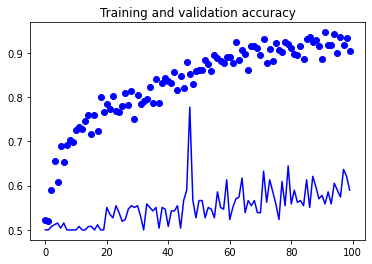

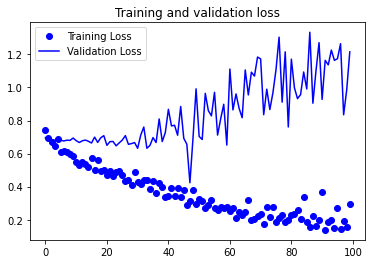

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# The above model is clearly overfitting as training accuracy is too high as compared to validation accuracy
# This is second model to with adam optimization and variable learning rate
model2 = tf.keras.models.Sequential([
    
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer='l2'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [10]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
         lambda epoch: 1e-8 * 10**(epoch / 25))

In [11]:
model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
history2 = model2.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,callbacks=[lr_schedule])

Epoch 1/100
8/8 [==============================] - 19s 2s/step - loss: 8.6007 - accuracy: 0.4950 - val_loss: 6.6629 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 22s 3s/step - loss: 5.5407 - accuracy: 0.5195 - val_loss: 4.5664 - val_accuracy: 0.7383
Epoch 3/100
8/8 [==============================] - 19s 2s/step - loss: 3.9273 - accuracy: 0.5451 - val_loss: 3.1992 - val_accuracy: 0.5000
Epoch 4/100
8/8 [==============================] - 20s 2s/step - loss: 2.7882 - accuracy: 0.4861 - val_loss: 2.3735 - val_accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 22s 3s/step - loss: 2.1327 - accuracy: 0.5635 - val_loss: 1.8819 - val_accuracy: 0.5000
Epoch 6/100
8/8 [==============================] - 23s 3s/step - loss: 1.7105 - accuracy: 0.5439 - val_loss: 1.5759 - val_accuracy: 0.7617
Epoch 7/100
8/8 [==============================] - 19s 2s/step - loss: 1.4536 - accuracy: 0.6129 - val_loss: 1.3767 - val_accuracy: 0.5000
Epoch 8/100
8/8 [==========

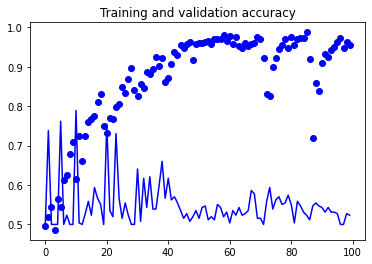

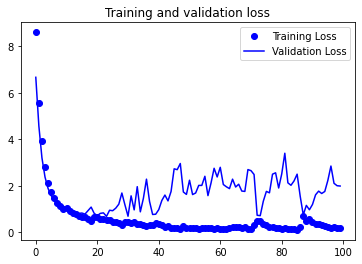

In [13]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# This shows the model is again overfitting along with few losses in features due to l2 regularizations hence this performed worse then the previous one..